# FFT

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
import IPython.display as ipd

In [147]:
FRAME_SIZE = 512 # window size
N_BANDS = 8 # N
y, sr = librosa.load(path='piano.wav', sr=40000) # resample, or return error when setting n_bands otherwise
ipd.Audio(y, rate=sr)

##   (A)

[Text(0, 0.5, 'Frequency bands'), Text(0.5, 1.0, 'Spectral contrast')]

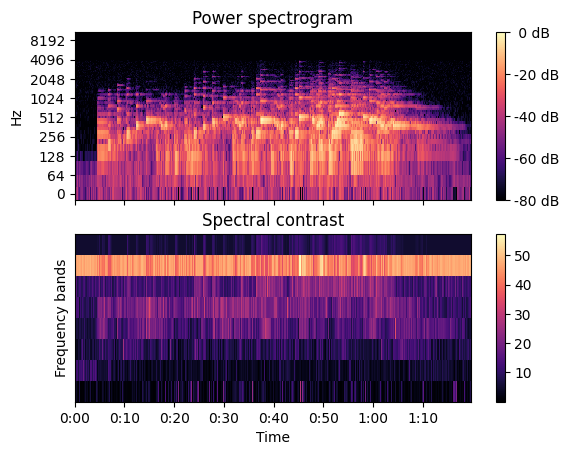

In [148]:
S = np.abs(librosa.stft(y, n_fft=FRAME_SIZE))
contrast = librosa.feature.spectral_contrast(S=S, sr=sr, n_bands=N_BANDS-1)
fig, ax = plt.subplots(nrows=2, sharex=True)
subfig1 = librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax[0])
fig.colorbar(subfig1, ax=[ax[0]], format='%2.0f dB')
ax[0].set(title='Power spectrogram')
ax[0].label_outer()
subfig2 = librosa.display.specshow(contrast, x_axis='time', ax=ax[1])
fig.colorbar(subfig2, ax=ax[1])
ax[1].set(ylabel='Frequency bands', title='Spectral contrast')

In [150]:
contrast.shape

(8, 3438)

## (B)

[Text(0.5, 1.0, 'Mel Spectrogram')]

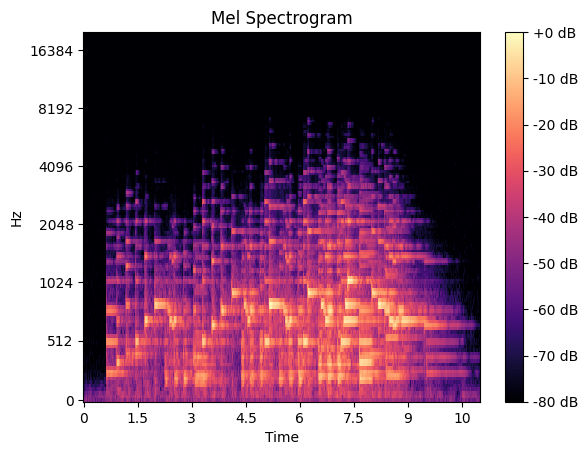

In [175]:
# Instead of using the feature that focuses on spectral contrast, 
# melSpectrogram is applied since the avoidance of many 'repeat' with setting N (or n_mels) to 128.
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
fig, ax = plt.subplots()
S_DB = librosa.power_to_db(S, ref=np.max)
subfig = librosa.display.specshow(S_DB, x_axis='time',
                         y_axis='mel', sr=sr,
                          ax=ax)
fig.colorbar(subfig, ax=ax, format='%2.0f dB')
ax.set(title='Mel Spectrogram')


In [172]:
m = np.argmax(S, axis=0)
m.shape

(860,)

In [173]:
C = []
repeat_times = 0
for i in range(1, m.shape[0]):
    if m[i-1] < m[i]:
        C.append('Up')
        repeat_times = 0
    elif m[i-1] > m[i]:
        C.append('Down')
        repeat_times = 0
    else:
        C.append('Repeat-' + str(repeat_times))
        repeat_times += 1

C

['Repeat-0',
 'Repeat-1',
 'Up',
 'Down',
 'Repeat-0',
 'Repeat-1',
 'Repeat-2',
 'Up',
 'Down',
 'Repeat-0',
 'Repeat-1',
 'Up',
 'Repeat-0',
 'Repeat-1',
 'Repeat-2',
 'Repeat-3',
 'Up',
 'Down',
 'Up',
 'Down',
 'Repeat-0',
 'Up',
 'Repeat-0',
 'Down',
 'Up',
 'Repeat-0',
 'Down',
 'Repeat-0',
 'Repeat-1',
 'Up',
 'Repeat-0',
 'Repeat-1',
 'Repeat-2',
 'Up',
 'Repeat-0',
 'Down',
 'Repeat-0',
 'Repeat-1',
 'Repeat-2',
 'Repeat-3',
 'Repeat-4',
 'Down',
 'Up',
 'Repeat-0',
 'Repeat-1',
 'Up',
 'Down',
 'Up',
 'Repeat-0',
 'Repeat-1',
 'Down',
 'Down',
 'Repeat-0',
 'Up',
 'Repeat-0',
 'Repeat-1',
 'Repeat-2',
 'Down',
 'Repeat-0',
 'Repeat-1',
 'Repeat-2',
 'Repeat-3',
 'Repeat-4',
 'Repeat-5',
 'Up',
 'Repeat-0',
 'Repeat-1',
 'Down',
 'Repeat-0',
 'Up',
 'Down',
 'Up',
 'Repeat-0',
 'Down',
 'Up',
 'Repeat-0',
 'Down',
 'Repeat-0',
 'Repeat-1',
 'Repeat-2',
 'Down',
 'Repeat-0',
 'Repeat-1',
 'Repeat-2',
 'Repeat-3',
 'Repeat-4',
 'Repeat-5',
 'Repeat-6',
 'Repeat-7',
 'Repeat-8',


In [161]:
# Write
f = open('encode.txt', 'w', encoding='utf-8')
for i in range(len(C)):
    f.write(str(C[i]) + '\n')
f.close()